# Assessing the network constraint with EV injection 

### The network capacity with EV trading result 

In [1]:
import pandapower as pp
import numpy as np
import pandas as pd
import simbench as sb
import os 

#### Load the modified network data 

In [2]:
# get the modified network data 
net=pp.from_excel ('LV_63_Bus.xlsx')

In [3]:
net

This pandapower network includes the following parameter tables:
   - bus (63 elements)
   - load (111 elements)
   - sgen (5 elements)
   - ext_grid (3 elements)
   - line (71 elements)
   - trafo (3 elements)
   - bus_geodata (63 elements)
   - loadcases (6 elements)

#### Load trading matrix 

In [4]:

Trad = np.load('trading_matrix.npy')

In [6]:
sum = np.sum(Trad, axis = 0)
sum 

array([6.79902313, 2.79931339, 0.89635798, 1.88103081, 6.7835788 ,
       1.82759751, 0.8315542 , 6.89314635, 4.85451682, 1.88903147,
       0.84937616, 2.87931711, 0.89424888, 4.82104238, 0.89051561,
       2.81938569, 0.        , 0.        , 0.85641789, 0.91902663,
       6.86376498, 0.        , 5.85302011, 0.90126513, 2.84722773,
       2.809465  , 5.81140901, 0.        , 6.8020395 , 2.81314023,
       0.        , 0.8882657 , 0.        , 0.        , 0.        ,
       4.81932357, 1.83134468, 2.85650246, 0.        , 3.86611852,
       0.85188322, 3.82840293, 4.86561529, 1.8493915 , 3.81673732,
       5.81953367, 0.        , 1.86382525, 3.81175323, 2.84766333,
       0.8348329 , 0.        , 1.84141661, 2.86357624, 1.82930822,
       0.89185092, 4.84766751, 0.        , 1.83234094, 1.83330637,
       1.84703949, 2.85080474, 6.87457646, 0.        , 3.86648658,
       5.79481319, 4.77189623, 0.        ])

In [7]:
substract = sum [0:57]
substract

array([6.79902313, 2.79931339, 0.89635798, 1.88103081, 6.7835788 ,
       1.82759751, 0.8315542 , 6.89314635, 4.85451682, 1.88903147,
       0.84937616, 2.87931711, 0.89424888, 4.82104238, 0.89051561,
       2.81938569, 0.        , 0.        , 0.85641789, 0.91902663,
       6.86376498, 0.        , 5.85302011, 0.90126513, 2.84722773,
       2.809465  , 5.81140901, 0.        , 6.8020395 , 2.81314023,
       0.        , 0.8882657 , 0.        , 0.        , 0.        ,
       4.81932357, 1.83134468, 2.85650246, 0.        , 3.86611852,
       0.85188322, 3.82840293, 4.86561529, 1.8493915 , 3.81673732,
       5.81953367, 0.        , 1.86382525, 3.81175323, 2.84766333,
       0.8348329 , 0.        , 1.84141661, 2.86357624, 1.82930822,
       0.89185092, 4.84766751])

#### EV battery discharge injection 
Treat the EV discharge as static generators with active power 

In [34]:
# create static generators 
i = 0
while i <57: 
    bus_idx = i 
    DisPower = substract[i]/1000
    pp.create_sgen(net, bus = bus_idx, p_mw = DisPower,  )
    i += 1
    

In [9]:
net

This pandapower network includes the following parameter tables:
   - bus (63 elements)
   - load (111 elements)
   - sgen (62 elements)
   - ext_grid (3 elements)
   - line (71 elements)
   - trafo (3 elements)
   - bus_geodata (63 elements)
   - loadcases (6 elements)

####  Power flow analysis 
Run the power flow calculation to assess the network constraints 

In [33]:
pp.runpp(net)

In [13]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.018246,-0.365217,-0.006799,-0.000000
1,1.008075,-0.410848,0.008201,0.004348
2,1.010591,-0.400160,0.010104,0.004347
3,1.013807,-0.384896,0.006119,0.003162
4,1.018132,-0.364169,-0.002784,0.001581
...,...,...,...,...
174,1.025000,0.000000,-0.082854,-0.058949
175,1.018191,-0.365872,0.000000,0.000000
176,1.018191,-0.365872,0.000000,0.000000
177,1.025000,0.000000,-0.083081,-0.059507


In [37]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,0.022107,0.017093,-0.022095,-0.017086,1.206629e-05,6.679499e-06,0.039578,0.039579,0.039579,1.019097,-0.120611,1.018580,-0.117803,11.086577
1,0.036748,0.028088,-0.036723,-0.028073,2.434135e-05,1.466829e-05,0.065884,0.065884,0.065884,1.013308,-0.090206,1.012681,-0.086981,18.454933
2,-0.004878,0.008694,0.004878,-0.008694,1.639111e-08,5.014227e-10,0.014120,0.014120,0.014120,1.019032,-0.118049,1.019032,-0.117937,3.955224
3,0.021635,0.043959,-0.021564,-0.043917,7.061590e-05,4.274408e-05,0.069586,0.069588,0.069588,1.016262,-0.018520,1.014788,0.032681,19.492533
4,0.024742,0.052681,-0.024742,-0.052680,5.896649e-07,3.610881e-07,0.082598,0.082598,0.082598,1.017062,-0.045050,1.017052,-0.044680,23.136610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.002210,-0.008826,-0.002208,0.008826,1.262425e-06,-1.131129e-07,0.012887,0.012886,0.012887,1.018988,-0.112445,1.019040,-0.121373,3.609871
67,-0.009403,-0.020625,0.009411,0.020629,7.841306e-06,4.030573e-06,0.032117,0.032116,0.032117,1.018692,-0.108521,1.019040,-0.121373,8.996425
68,-0.005380,-0.005790,0.005380,0.005789,9.527625e-07,-3.080618e-07,0.011196,0.011195,0.011196,1.018899,-0.119275,1.019040,-0.121373,3.136017
69,-0.004058,-0.002559,0.004059,0.002558,3.510629e-07,-6.870627e-07,0.006796,0.006795,0.006796,1.018952,-0.121371,1.019040,-0.121373,1.903629


In [38]:
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,0.035165,0.058279,-0.033366,-0.057856,0.001799,0.000423,0.001917,0.094593,1.025,0.0,1.019097,-0.120611,10.540643
1,0.035421,0.058861,-0.033620,-0.058431,0.001801,0.000430,0.001935,0.095484,1.025,0.0,1.019040,-0.121373,10.638300
2,0.035421,0.058861,-0.033620,-0.058431,0.001801,0.000430,0.001935,0.095484,1.025,0.0,1.019040,-0.121373,10.638300


## Checking againt constraints
#### Check the line loadings capacity: 

In [21]:

pp.overloaded_lines(net,max_load = 100)

Int64Index([], dtype='int64')

#### Check the bus capacity 
Bus voltage limite: miminum voltage 0.9 pu, maximum voltage 1.1 pu 

In [23]:
pp.violated_buses(net, min_vm_pu=0.90, max_vm_pu = 1.1)

Int64Index([], dtype='int64')

##### Check Transformer capacity

In [41]:
j=0
while j<3:   
    if net.res_trafo.loading_percent[j] > 100:
        print ('Transformer limit violated')
    else :
        print ('No violation')
    j+=1
        

No violation
No violation
No violation


In [24]:
import pandapower.plotting as plot

In [27]:
%matplotlib inline 

In [28]:
cmap_list=[(20, "green"), (50, "yellow"), (60, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot:>

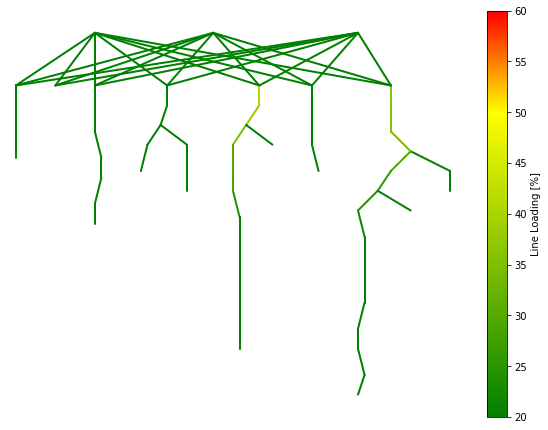

In [29]:
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc], figsize=(8,6))

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot:>

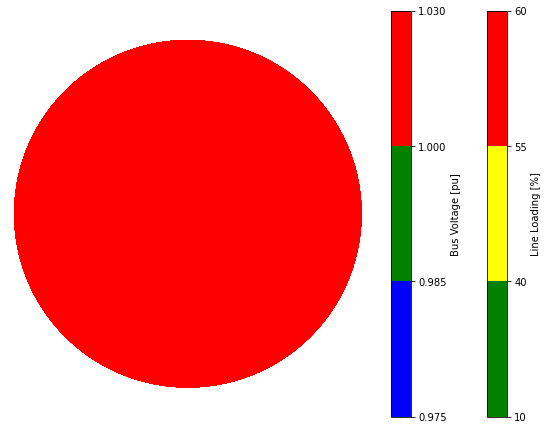

In [31]:
cmap_list=[((0.975, 0.985), "blue"), ((0.985, 1.0), "green"), ((1.0, 1.03), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2, cmap=cmap, norm=norm)

cmap_list=[((10, 40), "green"), ((40, 55), "yellow"), ((55, 60), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc, bc], figsize=(8,6))